In [13]:
import utils
import os
import numpy as np
import matplotlib.pyplot as plt
from algorithms import *
import scipy

In [ ]:
# On cherche à entrainer un beta-VAE à reconstruire les données hyperspectrales. 
# L'encoder projette les mesures dans l'espace des paramètres de la loi de distribution des coefficient d'abondances
# supposés ici d'abord gaussiens puis selon une loi de Dirichlet.
# Le decoder projette un échantillon distribué selon la loi des coefficients d'abondance dans l'espace des mesures hyperspectrales.
# Pour cela le decoder apprend la matrice M=E des spectres des sources.

In [26]:
# A = abondances = tuple (pixels, abondance des sources)
# E = sources = tuple (source élémentaire, spectres associés)
# data = mesures = tuple (pixel, spectre mesuré)

print(f"Nombre de pixels : {np.shape(A)[0]}")
print(f"Nombre de sources : {np.shape(A)[1]}")
print(f"Nombre de longueur d'ondes des spectres : {np.shape(data)[1]}")


Nombre de pixels : 9025
Nombre de sources : 3
Nombre de longueur d'ondes des spectres : 156


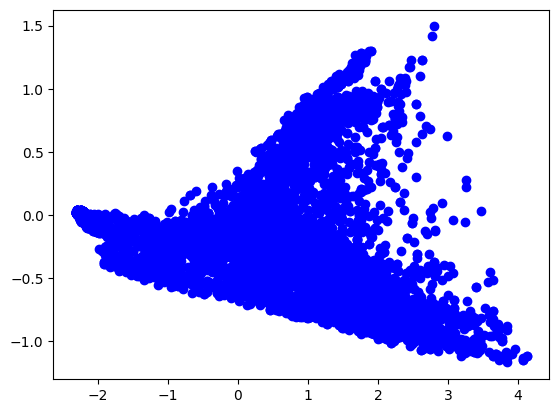

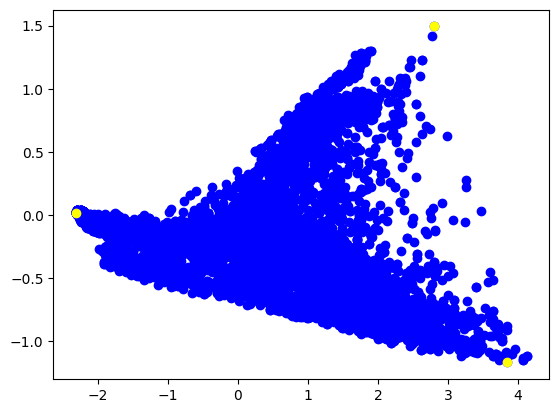

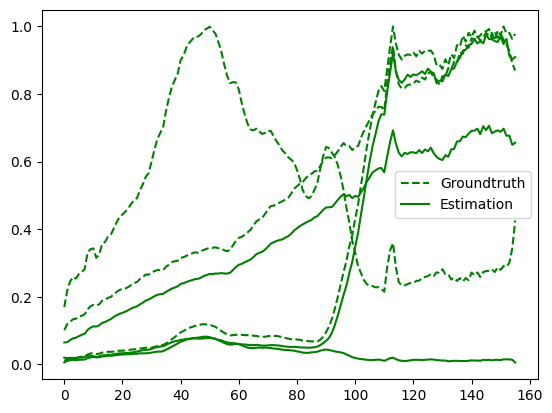

In [14]:
hsi,_,_ = utils.load_HSI("./dataset/Samson.mat") # load Samson Dataset
data = hsi.get_spectra() # Get the hyperspectral observation 
A = hsi.get_abundances() # Get the ground truth for the abundances
E = hsi.endmembers # Get the ground truth for the endmembers
n_sources = 3

# Display the hyperspectral observations in the reduced dimension space
Yproj, _ = projection(data.T, n_sources, method='pca')
plt.scatter(Yproj[:, 0], Yproj[:, 1], color='blue')
plt.show()

## Endmember estimation with NFINDR algorithm
nfindr = NFINDR(data.T, n_sources)
nfindr.run()
nfindr.display()

plt.figure()
plt.plot(E[0], '--', color='green', label='Groundtruth')
plt.plot(E[1], '--', color='green')
plt.plot(E[2], '--', color='green')
plt.plot(nfindr.M[:, 0], color='green', label='Estimation')
plt.plot(nfindr.M[:, 1], color='green')
plt.plot(nfindr.M[:, 2], color='green')
plt.legend()
plt.show()